In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv("/content/Iris.csv")

# Basic EDA

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

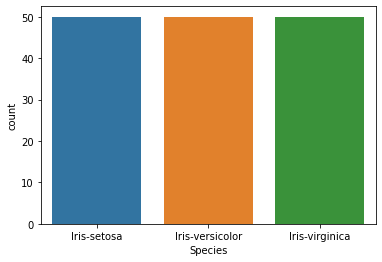

In [ ]:
x = df.value_counts("Species")
print(x)
sns.countplot(x=df["Species"])

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species_num'] = label_encoder.fit_transform(df['Species'])


<AxesSubplot:>

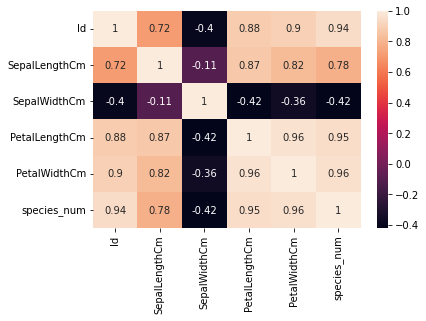

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
df_features = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df_target = df[["Species"]]
print(df_target)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2,random_state = 200)

In [ ]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [ ]:
# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

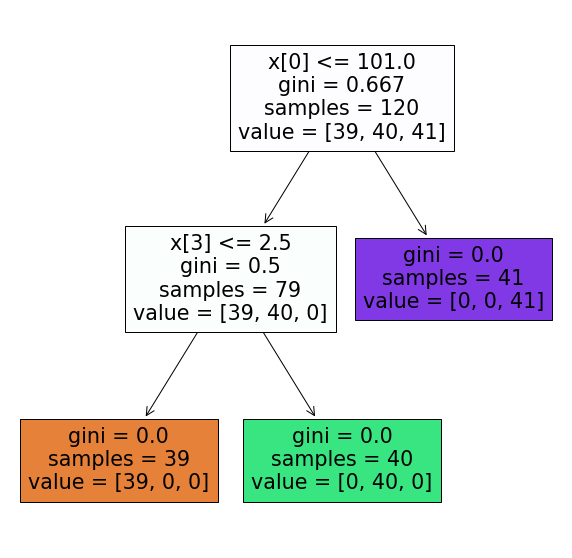

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled = True)
plt.show()

In [ ]:
#Predict the response for test dataset
y_pred_test = classifier.predict(x_test)

In [ ]:
from sklearn import metrics

score_test= metrics.accuracy_score(y_pred_test,y_test)
print(score_test)


0.9666666666666667


In [ ]:
from sklearn import metrics

#create confusion matrix
c_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#print confusion matrix
print(c_matrix)

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


In [ ]:
from sklearn import metrics

classification_report = metrics.classification_report(y_pred_test,y_test)
print(classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

